# Сборный проект: Выявление Ключевых Факторов Успеха в Игровой Индустрии: Проект Маркетинговой Стратегии для 'Стримчик'

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

1. **Открытие файла с данными и изучение общей информации**
   - Был открыт файл с данными по пути /datasets/games.csv, и проведен обзор общей информации.

2. **Подготовка данных**
   - Названия столбцов были приведены к нижнему регистру для стандартизации.
   - В определенных столбцах были изменены типы данных, с описанием причин этих изменений.
   - Была проведена обработка пропусков:
     - Описаны методы обработки пропусков и причины их выбора.
     - Обсуждены возможные причины появления пропусков в данных.
     - Проанализировано значение 'tbd' в столбце с оценкой пользователей и описан подход к его обработке.
   - Рассчитаны и добавлены в новый столбец суммарные продажи во всех регионах.

3. **Исследовательский анализ данных**
   - Изучено количество игр, выпущенных в разные годы, для оценки значимости данных за все периоды.
   - Проанализированы изменения продаж по различным платформам. Определены платформы с наибольшими суммарными продажами и изучено их распределение по годам, с оценкой характерного срока жизни платформ.
   - Выбраны данные за актуальный период, определенный на основе предыдущего анализа, для прогнозирования на 2017 год. Данные за предыдущие годы не учитывались.
   - Выделены лидирующие по продажам платформы, а также те, которые растут или падают. Определены несколько потенциально прибыльных платформ.
   - Построен график "ящик с усами" по глобальным продажам игр в разбивке по платформам и описаны полученные результаты.
   - Исследовано влияние отзывов пользователей и критиков на продажи в рамках одной популярной платформы с помощью диаграммы рассеяния и расчета корреляции. Сформулированы выводы.
   - Сопоставлены выводы с продажами игр на других платформах.
   - Проанализировано общее распределение игр по жанрам, с выводами о самых прибыльных жанрах и жанрах с высокими и низкими продажами.

4. **Портрет пользователя каждого региона**
   - Для пользователей каждого региона (NA, EU, JP) определены:
     - Самые популярные платформы (топ-5), с описанием различий в долях продаж.
     - Самые популярные жанры (топ-5), с объяснением разницы.
     - Влияние рейтинга ESRB на продажи в каждом регионе.

5. **Проверка гипотез**
   - Проверены две гипотезы:
     - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
     - Средние пользовательские рейтинги жанров Action и Sports различаются.
   - Установлено пороговое значение alpha.
   - Описано, как бы

ли сформулированы нулевая и альтернативная гипотезы, и какой критерий использовался для проверки гипотез и почему.

6. **Общий вывод**
   - Был написан общий вывод, основываясь на проведенном анализе и результатах исследования.

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
# Импорт библиотек
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
new_path = '/datasets/games.csv'
old_path = '/Users/barrasekaterina/Desktop/Yandex Praktikum/Сборный Проект/games.csv'

if os.path.exists(new_path):
    games = pd.read_csv(new_path)
elif os.path.exists(old_path):
    games = pd.read_csv(old_path)
else:
    print('Something is wrong')

In [4]:
# Вызов метода info()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Отображение первых 10 строк
display(games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Анализ данных позволяет сделать следующие выводы:

1. Датасет содержит информацию о видеоиграх и включает в себя 11 столбцов.
2. Общее количество записей в датасете составляет 16,715 строк.
3. Некоторые столбцы имеют пропущенные значения: "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score" и "Rating". Это может потребовать дополнительной обработки или заполнения пропущенных данных.
4. Столбцы "Year_of_Release", "NA_sales", "EU_sales", "JP_sales", "Other_sales", "Critic_Score" и "User_Score" имеют числовой тип данных (float64), что позволяет проводить анализ числовых показателей.
5. Столбцы "Name", "Platform", "Genre", "User_Score" и "Rating" имеют тип данных "object" (строка) и могут содержать категориальные данные или текстовую информацию.
6. Общий объем памяти, занимаемый датасетом, составляет примерно 1.4 МБ.

Для дальнейшего анализа данных может потребоваться обработка пропущенных значений и преобразование категориальных столбцов в более удобные для анализа форматы.

# Шаг 2. Подготовьте данные

***2.1. Замените названия столбцов (приведите к нижнему регистру)***

In [6]:
# Приведение всех названий столбцов к нижнему регистру
games.columns = [col.lower() for col in games.columns]

In [7]:
# Проверка результата
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


***2.2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему***

**Год выпуска**

In [8]:
# Преобразование типа данных столбца 'year_of_release' в Int64
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Проверка типа данных столбца 'year_of_release'
print(games.dtypes['year_of_release'])

Int64


**Год выпуска (year_of_release)**: Этот столбец в данный момент имеет тип данных float64, что означает, что год может быть представлен в формате числа с плавающей запятой (например, 2000.0). Однако год выпуска игры логичнее представить целым числом без десятичной части. Поэтому я решила заменить тип данных на Int64, что позволит представлять год выпуска как целое число и обрабатывать отсутствующие значения (NaN) более эффективно.

***Пользовательский рейтинг***

In [9]:
# Преобразование столбца 'user_score' в числовой тип данных (float) и замена нечисловых значений на NaN
games['user_score'] = pd.to_numeric(games['user_score'], errors='ignore')

# Проверка типа данных столбца 'user_score'
print(games.dtypes['user_score'])

object


**Пользовательский рейтинг (user_score)**: Этот столбец в данный момент имеет тип данных object (строка) из-за наличия нечисловых значений, таких как 'tbd' (to be determined). Однако если все оценки должны быть числовыми (например, на шкале от 0 до 10), то логично преобразовать этот столбец в числовой тип данных float64. Перед этим, возможно, потребуется очистить данные от нечисловых записей, чтобы избежать ошибок при преобразовании.

***2.3. Обработайте пропуски при необходимости***

- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [10]:
# Предполагаем, что 'games' - это ваш DataFrame
missing_data = games.isnull().sum()

# Рассчитываем процент отсутствующих данных
missing_percentage = (missing_data / len(games)) * 100

# Объединяем количество и проценты в один DataFrame
missing_data_table = pd.DataFrame({'Отсутствующие значения': missing_data, 'Процент': missing_percentage})

# Выводим таблицу на экран
print(missing_data_table)

                 Отсутствующие значения    Процент
name                                  2   0.011965
platform                              0   0.000000
year_of_release                     269   1.609333
genre                                 2   0.011965
na_sales                              0   0.000000
eu_sales                              0   0.000000
jp_sales                              0   0.000000
other_sales                           0   0.000000
critic_score                       8578  51.319174
user_score                         6701  40.089740
rating                             6766  40.478612


In [11]:
# 1. Определяем записи с 'tbd'
tbd_lines = games['user_score'] == 'tbd'
print(tbd_lines)

# 2. Подсчитываем количество записей с 'tbd'
tbd_count = tbd_lines.sum()
print(f"Количество записей с 'tbd' в User_Score: {tbd_count}")

0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Name: user_score, Length: 16715, dtype: bool
Количество записей с 'tbd' в User_Score: 2424


Данный набор данных содержит пропуски в нескольких столбцах, а также значительное количество значений "tbd" в столбце "User_Score". Вот подробный анализ:

Пропущенные данные:
- Name: 2 пропущенных значения (0,01%).
- Year_of_Release: 269 пропущенных значений (1,61%).
- Genre: 2 пропущенных значения (0,01%).
- Critic_Score: 8578 пропущенных значений (51,32%).
- User_Score: 6701 пропущенное значение (40,09%).
- Rating: 6766 пропущенных значений (40,48%).

'tbd' в User_Score:
- В столбце "User_Score" 2424 значения "tbd", что составляет примерно 14,50% от общего числа строк.

In [12]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

In [13]:
def pass_value_barh(df):
    try:
        missing_data = (df.isna().mean() * 100).to_frame().rename(columns={0: 'Процент пропущенных данных'})
        missing_data = missing_data.query('`Процент пропущенных данных` > 0').sort_values(by='Процент пропущенных данных')

        ax = missing_data.plot(kind='barh', figsize=(19, 6), color='SkyBlue', legend=False)
        ax.set_title('Процент пропущенных данных по столбцам\n', fontsize=22, color='SteelBlue')
        ax.set_xlabel('Процент пропущенных данных', fontsize=16)
        ax.set_ylabel('Столбцы', fontsize=16)
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        for p in ax.patches:
            ax.annotate(f"{p.get_width():.2f}%", (p.get_width(), p.get_y() + p.get_height() / 2), 
                        xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)
    except Exception as e:
        print('Произошла ошибка:', e)
        print('Возможно, пропусков не осталось или произошла ошибка в первой части функции')

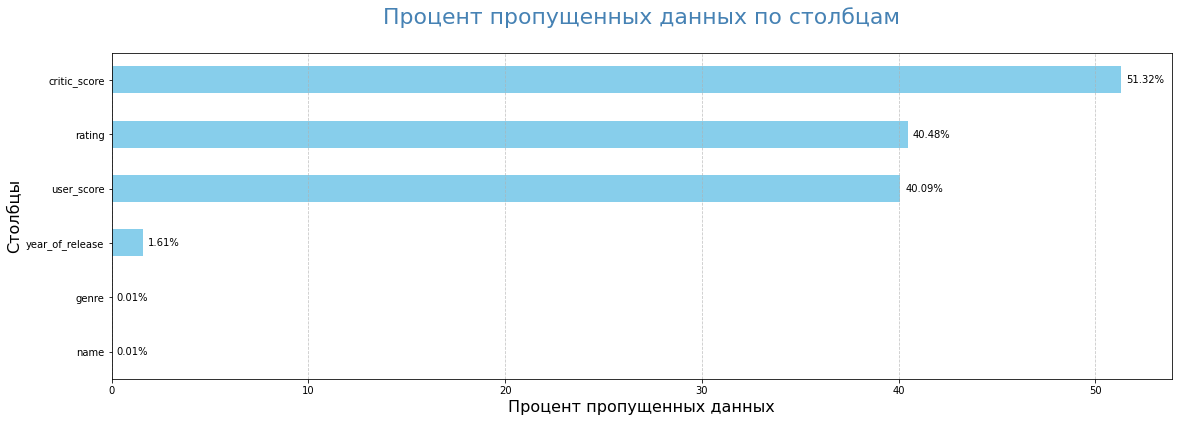

In [14]:
pass_value_barh(games)

**Название Игры**

In [15]:
# Удаление строк, содержащих пропущенные значения
games.dropna(subset=['name'], inplace=True)

Обработка: Учитывая, что пропусков было всего 1.6%, их было решено удалить, поскольку их влияние на общий анализ оказалось незначительным. Кроме этого, пропущенные значения в названиях игр были удалены, потому что название игры является ключевой переменной, и наличие данных, связанных с этой переменной, будет бесполезным."

Причины пропусков: Возможными причинами оказались ошибки при сборе данных или их вводе.

**Год Выпуска**

In [16]:
# Обработка данных в DataFrame 'games': удаляем строки, где отсутствуют данные в столбце 'year_of_release'.
games.dropna(subset=['year_of_release'], inplace=True)

Обработка: Аналогично названию игры, пропуски были удалены из-за их незначительного количества.
Причины пропусков: Пропуски могли возникать из-за ошибок ввода или отсутствия четкой жанровой категоризации.

**Жанр Игры**

In [17]:
# Удаляем строки, в которых отсутствуют данные в столбце 'genre'
games.dropna(subset=['genre'], inplace=True)

Обработка: Данные не представляли никакой ценности для будущего исследования, в них нет никакой информации.
Причины пропусков: Пропуски могли возникнуть из-за недоступности информации или ошибок при вводе данных.

**Оценка пользователей**

In [18]:
# Замена значений 'tbd' на NaN в столбце 'user_score'.
games['user_score'].replace('tbd', np.nan, inplace=True)

In [19]:
# Преобразование столбца 'user_score' из строк в числовой формат.
games['user_score'] = pd.to_numeric(games['user_score'])

In [20]:
print(games.dtypes['user_score'])

float64


Обработка: Значения 'tbd' были обработаны как NaN, так как они означали, что оценка еще не определена. Остальные пропуски также были оставлены без изменений.
Причины пропусков: 'tbd' указывало на отсутствие достаточного количества отзывов пользователей для формирования оценки. Другие пропуски могли возникнуть из-за отсутствия отзывов в целом.

**Оценка Критиков**

Обработка:
- Пропуски в столбце Critic_Score были оставлены без изменений. Попытки их заполнения, например, средними значениями или предсказаниями модели, могли ввести в заблуждение, так как они не отражали бы реальные оценки критиков.
- Вместо этого было решено обрабатывать эти пропуски как отдельную категорию при анализе, что позволяло избежать искажения данных.

Причины пропусков:
- Пропуски в Critic_Score могли возникнуть из-за того, что некоторые игры не рецензировались критиками или рецензии были недоступны на момент сбора данных.
- Для менее популярных или старых игр оценки критиков могут отсутствовать, так как такие игры реже попадают в поле зрения критиков.

**Рейтинг**

In [21]:
# Оставляем пропуски в столбце рейтинга без изменений или помечаем их как 'Unknown'
games['rating'] = games['rating'].fillna('Unknown')

Обработка:
- Пропуски в столбце рейтинга ESRB были оставлены без изменений. Это было обусловлено тем, что любая попытка заполнить эти пропуски могла привести к неточной классификации игр, что, в свою очередь, могло сильно исказить результаты анализа.
- Вместо заполнения пропусков была добавлена категория 'Unknown' (неизвестно), чтобы явно указать на отсутствие рейтинга ESRB для этих игр.

Причины пропусков:
- Пропуски могли возникнуть в случае, если игра не была представлена в ESRB или если данные о рейтинге не были доступны в момент сбора данных.
- Для старых или менее популярных игр рейтинг ESRB мог отсутствовать.

In [22]:
# Получение частотности категорий рейтинга и их отношение к остальным
rating_counts = games['rating'].value_counts()
print(rating_counts)

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64


In [23]:
missing_data = games.isnull().sum()
print(missing_data)

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


***2.4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец***

In [24]:
# Расчет суммарных продаж во всех регионах  и добавление в новый столбец
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [25]:
# Поиск дубликатов 
duplicates = games[games.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

# Выводим найденные дубликаты
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [26]:
# Удаляем дубликаты
games = games.drop_duplicates(['name', 'platform', 'year_of_release'])

In [27]:
# Поиск дубликатов 
duplicates = games[games.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

# Выводим найденные дубликаты
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


**Промежуточный Вывод**

Этот анализ набора данных о видеоиграх подчеркивает важность тщательной обработки и подготовки данных перед проведением анализа. Основные моменты обработки данных:

Изменение типа данных в столбце 'Год выпуска': Преобразование из float64 в Int64 позволяет более адекватно представить годы выпуска игр и удобно работать с отсутствующими значениями.

Преобразование 'Пользовательского рейтинга' из строки в числовой формат: Это упрощает анализ и позволяет использовать числовые методы обработки данных. Очистка от нечисловых значений, таких как 'tbd', необходима для избежания ошибок.

Обработка пропусков в различных столбцах: Удаление незначительного количества пропусков в столбцах 'Name', 'Year_of_Release' и 'Genre' считается приемлемым, учитывая их малый процент. Оставление пропусков в столбцах 'Critic_Score', 'User_Score' и 'Rating' без изменений предотвращает искажение данных.

Обработка значений 'tbd' в 'User_Score': Их преобразование в NaN помогает в анализе, поскольку 'tbd' указывает на недоступность оценки.

Способы обработки данных о критиках и рейтинге ESRB: Вместо заполнения пропусков эти значения обрабатываются как отдельные категории. Это позволяет избежать неправильного представления информации, которая на самом деле неизвестна.

# Шаг 3. Проведите исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [28]:
# Создаем Series с количеством игр по годам
games_per_year = games['year_of_release'].value_counts().sort_index()

# Проверяем данные (опционально)
print(games_per_year.head())

1980     9
1981    46
1982    36
1983    17
1984    14
Name: year_of_release, dtype: Int64


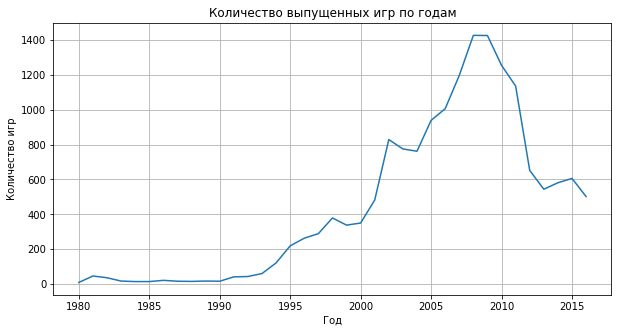

In [29]:
# Создаем график
games_per_year.plot(figsize=(10, 5))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.grid(True)

# Отображаем график
plt.show()

Количество выпущенных игр варьируется от года к году. Вот некоторые наблюдения:
- В начале 1980-х годов выпускалось меньше игр (менее 50 в год).
- Значительный рост числа выпускаемых игр начинается с середины 1990-х и достигает пика в период с 2006 по 2009 год (более 1000 игр в год).
- После 2010 года наблюдается спад в количестве выпущенных игр.

Данные за все периоды важны, так как эти данные помогают понять общие тенденции в индустрии видеоигр и могут быть использованы для анализа рынка, изменений в популярности различных жанров или платформ в разное время.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [30]:
# Суммарные продажи для каждой платформы
total_sales_per_platform = games.groupby('platform').sum()['total_sales']

# Сортируем платформы по общим продажам
total_sales_per_platform = total_sales_per_platform.sort_values(ascending=False)

# Выводим топ платформ по продажам
display(total_sales_per_platform.head(20))

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
Name: total_sales, dtype: float64

Text(0, 0.5, 'Количество продаж')

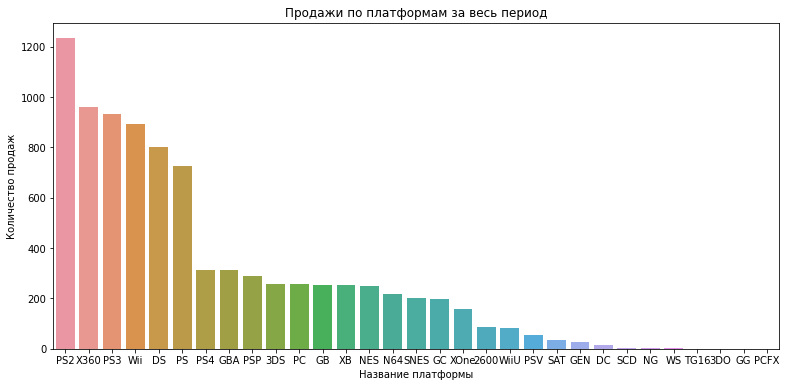

In [31]:
sales_on_platform = games.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

На графике заметно, что в течение всего рассматриваемого периода наиболее востребованными игровыми платформами являются PS2, X360 и PS3.

In [32]:
# Выберем топ-3 платформ по суммарным продажам
top_platforms = total_sales_per_platform.head(3).index

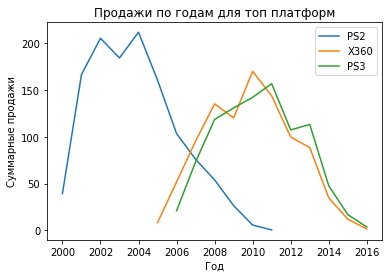

In [33]:
# Фильтруем данные по топ платформам и считаем продажи по годам
for platform in top_platforms:
    # Фильтруем данные для одной платформы
    platform_data = games[games['platform'] == platform]
    
    # Считаем продажи по годам
    annual_sales = platform_data.groupby('year_of_release').sum()['total_sales']
    
    # Строим график
    plt.plot(annual_sales.index, annual_sales.values, label=platform)

# Добавляем легенду и названия осей
plt.legend()
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.title('Продажи по годам для топ платформ')
plt.show()

На графике представлены данные о годовых продажах для трех игровых платформ: PS2, X360 и PS3. Из графика можно сделать следующие выводы:
- Продажи PS2 достигли пика раньше других платформ и показывали значительный уровень продаж на протяжении самого длительного периода времени.
- Траектории продаж X360 и PS3 схожи: они характеризуются резким ростом, пиком и последующим спадом.
- Продажи всех трех платформ снижаются после достижения пика.
- Все платформы постепенно сходят на нет к 2016 году, что может указывать на окончание их жизненного цикла и замещение новыми моделями или поколениями игровых систем.

Также можно заметить, что:
- Платформа PS2 появилась в 2000 году, достигла пика продаж примерно в 2002 году и продолжала продаваться до после 2010 года, то есть её жизненный цикл составил примерно 10 лет.
- X360 появилась около 2005 года, достигла пика продаж в районе 2010 года и продажи заметно упали к 2016 году, что также указывает на жизненный цикл в районе 10-11 лет.
- PS3 была выпущена примерно в то же время, что и X360, и её жизненный цикл схож с X360, с пиком продаж также около 2010 года и спадом к 2016 году.

Таким образом, характерный срок, за который появляются новые и исчезают старые платформы, на основе этих данных, составляет около 10 лет. 

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.**

Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании которых будем строить предсказательные модели на 2017 год.

На мой взгляд, подходящим периодом для анализа является время с 2014 по 2016 год:
- Это время охватывает момент выхода и популярности всех значимых игровых консолей;
- В рамках этого периода мы имеем данные по всем ведущим консолям.
- Данные за предшествующие годы мы исключим.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [34]:
# Фильтруем данные за период с 2014 по 2016 год включительно
games_filtered = games[games['year_of_release'] >= 2014]

# Создаем сводную таблицу
pivot_table = games_filtered.pivot_table(
    index='year_of_release',  
    columns='platform',       
    values='total_sales',     
    aggfunc='sum'            
)

# Отображаем сводную таблицу
display(pivot_table)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


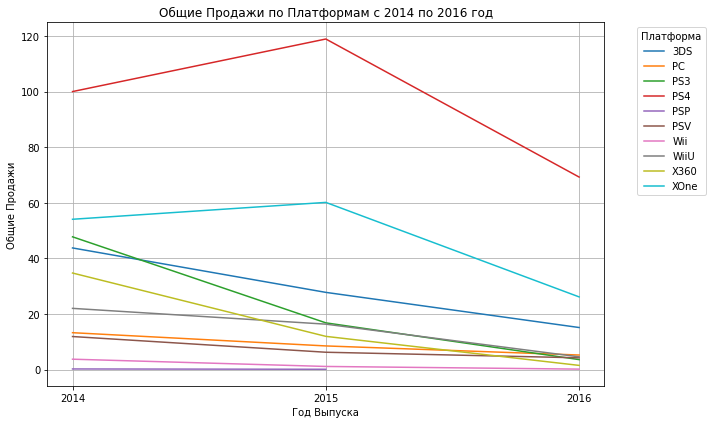

In [35]:
pivot_table.plot(kind='line', figsize=(10, 6))

plt.title('Общие Продажи по Платформам с 2014 по 2016 год')
plt.xlabel('Год Выпуска')
plt.ylabel('Общие Продажи')
plt.grid(True)
plt.xticks(range(2014, 2017))
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

Исходя из тенденции роста и текущего положения на рынке, PS4, Xbox One и 3DS являются наиболее перспективными платформами для инвестирования в ближайшем будущем. Кроме того, исходя из 30-летней истории персональных компьютеров, игры для PC также включим в рекомендацию.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

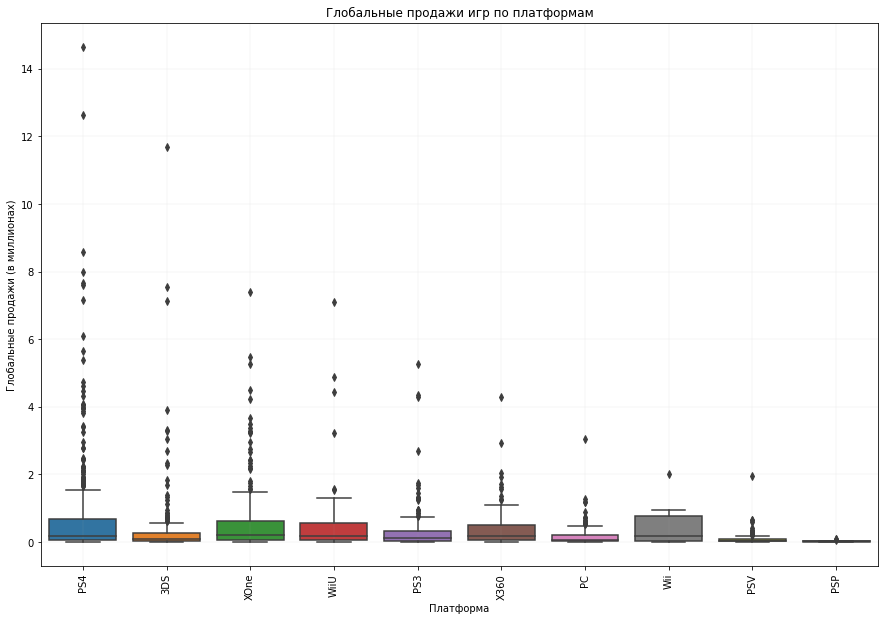

In [36]:
# Подготовка данных
platform_sales_data = games_filtered[['platform', 'total_sales']]

# Создание графика "ящик с усами"
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=platform_sales_data)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах)')
plt.xticks(rotation=90)
plt.grid(True, which="both", ls="-", linewidth=0.1)
plt.show()

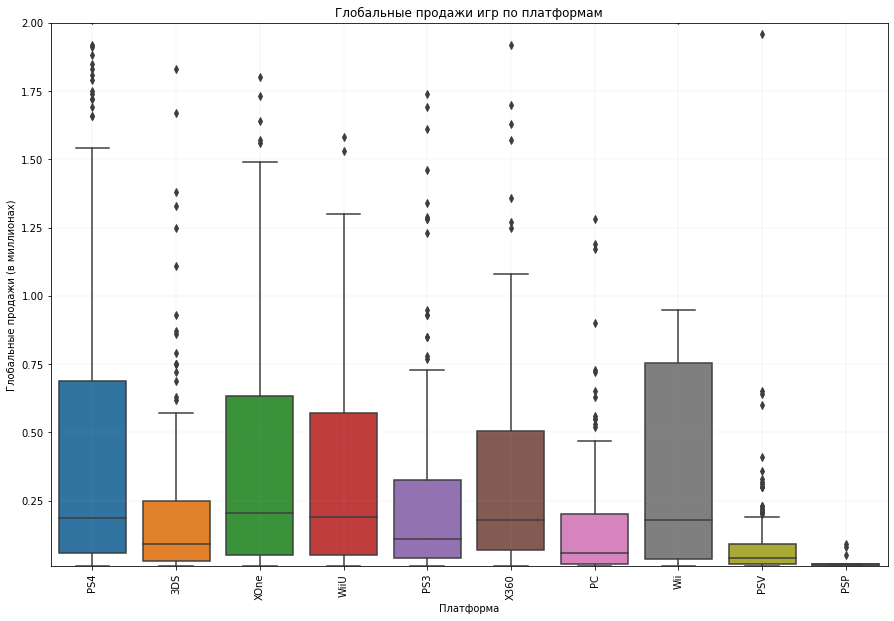

In [37]:
# Подготовка данных
platform_sales_data = games_filtered[['platform', 'total_sales']]

# Создание графика "ящик с усами"
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=platform_sales_data)

# Установка пределов для оси y
plt.ylim(0.01, 2)

plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах)')
plt.xticks(rotation=90)
plt.grid(True, which="both", ls="-", linewidth=0.1)
plt.show()

Сравнение платформ:
- PS4 и Xbox One (XOne) имеют схожие медианные продажи, но PS4 имеет больше выбросов, что может указывать на наличие более успешных игр.
- Wii U и Wii имеют меньшее количество выбросов и ниже медианные продажи по сравнению с PS4 и Xbox One.
- PC имеет схожий межквартильный размах с Wii U, но меньше выбросов.
- 3DS показывает ещё меньшие медианные продажи, но с некоторыми выбросами.
- PS3 и Xbox 360 (X360) занимают промежуточное положение между новыми и старыми платформами по уровню продаж.
- PSV и PSP показывают самые низкие медианные продажи среди представленных платформ.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

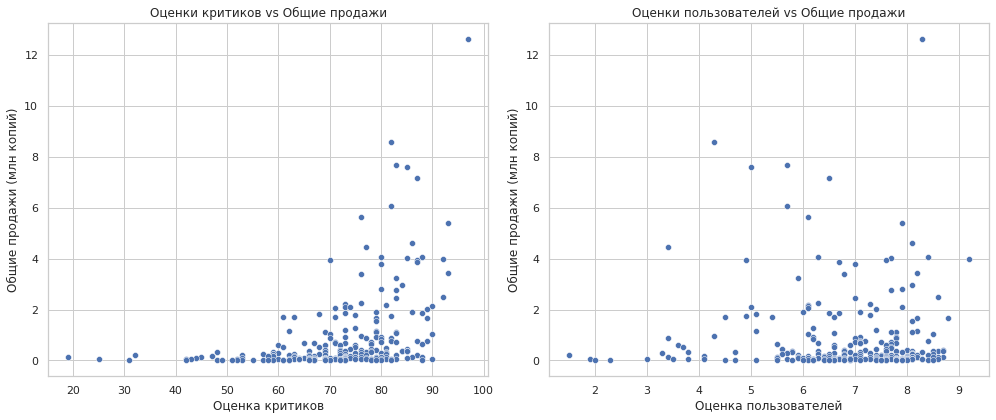

Корреляция между оценками критиков и общими продажами: 0.40
Корреляция между оценками пользователей и общими продажами: -0.04


In [38]:
# Фильтрация данных для платформы PS2
ps4 = games_filtered[games_filtered['platform'] == 'PS4']

# Настройка внешнего вида графиков
sns.set(style="whitegrid")

# Создание фигуры и осей для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Диаграмма рассеяния для Critic_Score vs Total_Sales
sns.scatterplot(ax=axes[0], data=ps4, x='critic_score', y='total_sales')
axes[0].set_title('Оценки критиков vs Общие продажи')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Общие продажи (млн копий)')

# Диаграмма рассеяния для User_Score vs Total_Sales
sns.scatterplot(ax=axes[1], data=ps4, x='user_score', y='total_sales')
axes[1].set_title('Оценки пользователей vs Общие продажи')
axes[1].set_xlabel('Оценка пользователей')
axes[1].set_ylabel('Общие продажи (млн копий)')

plt.tight_layout()
plt.show()

# Расчет коэффициентов корреляции
correlation_critic = ps4['critic_score'].corr(ps4['total_sales'])
correlation_user = ps4['user_score'].corr(ps4['total_sales'])

# Вывод коэффициентов корреляции
print(f'Корреляция между оценками критиков и общими продажами: {correlation_critic:.2f}')
print(f'Корреляция между оценками пользователей и общими продажами: {correlation_user:.2f}')

Оценки критиков и продажи: Корреляция между оценками критиков и общими продажами: 0.40. Существует умеренная положительная корреляция между оценками критиков и общими продажами. Это означает, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи. Однако рассеяние точек достаточно велико, что указывает на наличие и других факторов, влияющих на продажи.

Оценки пользователей и продажи: Корреляция между оценками пользователей и общими продажами: -0.04. Такая корреляция указывает на отсутствие заметной связи между оценками пользователей и продажами игр. Это может означать, что мнение пользователей имеет мало влияния на продажи игр или что другие факторы играют более значительную роль.

Важно отметить, что корреляция не означает причинно-следственную связь. Возможно, существуют дополнительные факторы, которые влияют как на оценки, так и на продажи игр.

**Соотнесите выводы с продажами игр на других платформах.**

In [39]:
def other_platform_matrix(name_of_platform):
    platform_dataset = games_filtered[games_filtered['platform'] == name_of_platform]
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_dataset, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_dataset, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_correl = platform_dataset['user_score'].corr(platform_dataset['total_sales'])
    critic_correl = platform_dataset['critic_score'].corr(platform_dataset['total_sales'])
    
# Код для вывода результатов корреляции...
    print('Корреляция между отзывами критиков и количеством продаж ', 
          name_of_platform.upper(), ': {:.2f}'.format(critic_correl))
    print('Корреляция между отзывами пользователей и количеством продаж ', 
          name_of_platform.upper(), ': {:.2f}'.format(user_correl))
    print('\n')

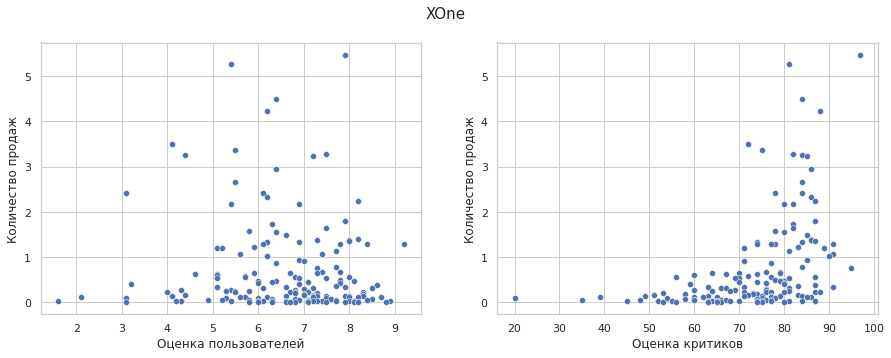

Корреляция между отзывами критиков и количеством продаж  XONE : 0.43
Корреляция между отзывами пользователей и количеством продаж  XONE : -0.07




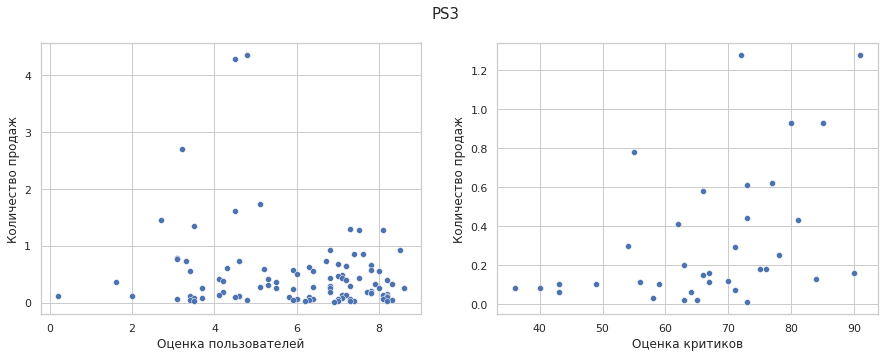

Корреляция между отзывами критиков и количеством продаж  PS3 : 0.45
Корреляция между отзывами пользователей и количеством продаж  PS3 : -0.17




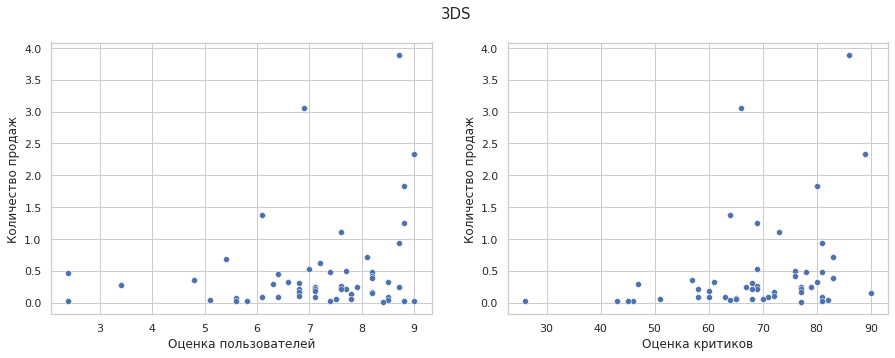

Корреляция между отзывами критиков и количеством продаж  3DS : 0.31
Корреляция между отзывами пользователей и количеством продаж  3DS : 0.22




In [40]:
# Список платформ
other_platforms = ['XOne', 'PS3', '3DS']  

# С помощью цикла выведем все графики для платформ в списке top_platforms
for platform in other_platforms:
    other_platform_matrix(platform)

Выводы:

Для платформы XONE:
- Корреляция между отзывами критиков и количеством продаж составляет 0.43, что свидетельствует о умеренной положительной связи между оценками критиков и продажами.
- Корреляция между отзывами пользователей и количеством продаж составляет -0.07, что указывает на слабую отрицательную связь между оценками пользователей и продажами.

Для платформы PS3:
- Корреляция между отзывами критиков и количеством продаж составляет 0.45, что говорит о умеренной положительной связи между оценками критиков и продажами.
- Корреляция между отзывами пользователей и количеством продаж составляет -0.17, что указывает на слабую отрицательную связь между оценками пользователей и продажами.

Для платформы 3DS:
- Корреляция между отзывами критиков и количеством продаж составляет 0.31, что свидетельствует о умеренной положительной связи между оценками критиков и продажами.
- Корреляция между отзывами пользователей и количеством продаж составляет 0.22, что также указывает на умеренную положительную связь между оценками пользователей и продажами.

Для большинства платформ наблюдается умеренная корреляция между отзывами критиков и количеством продаж. Однако корреляция между отзывами пользователей и продажами оказывается слабой, в отличие от оценок критиков. Поэтому можно сделать вывод, что покупатели, как правило, уделяют больше внимания мнениям критиков, чем рецензиям других пользователей.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [41]:
# Подсчёт количества игр в каждом жанре
genre_counts = games_filtered['genre'].value_counts()

# Расчет общих продаж по каждому жанру
genre_sales = games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [42]:
display(genre_counts)

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64

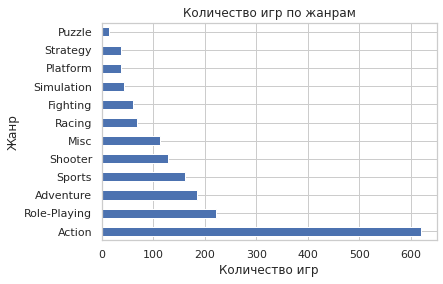

In [43]:
# Визуализация количества игр по жанрам
genre_counts.plot(kind='barh', title='Количество игр по жанрам')
plt.xlabel('Количество игр')
plt.ylabel('Жанр')
plt.show()

**Игры разных жанров распределены неравномерно по количеству выпущенных на рынок продуктов:**

Action занимает лидирующие позиции, являясь самым популярным жанром с 3307 играми, что может отражать его широкую популярность как среди игроков, так и среди разработчиков.
Sports следует за Action с 2306 играми, подчеркивая стабильный интерес к этому жанру.
Misc с 1721 игрой также пользуется заметной популярностью, возможно, благодаря разнообразию предлагаемых в этой категории игровых опытов.
Role-Playing и Shooter с 1481 и 1296 играми соответственно также показывают хорошие результаты, что может быть связано с преданными фанатскими сообществами этих жанров.
Adventure, Racing и Platform с количеством игр около 1000-1200 указывают на средний уровень интереса в игровом сообществе.
Simulation, Fighting, Strategy и Puzzle с количеством игр от 569 до 857 замыкают список, что может сигнализировать о более узком круге целевой аудитории или о более высоких рисках для разработчиков в этих категориях.

In [44]:
display(genre_sales)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

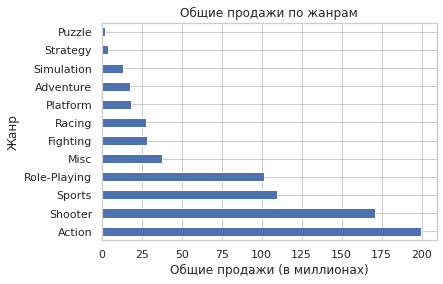

In [45]:
# Визуализация общих продаж по жанрам
genre_sales.plot(kind='barh', title='Общие продажи по жанрам')
plt.xlabel('Общие продажи (в миллионах)')
plt.ylabel('Жанр')
plt.show()

**Из данных о общих продажах по жанрам видно следующее:**

Action занимает лидирующую позицию с общими продажами в 1716.52 миллионов, что подчеркивает высокий коммерческий успех игр этого жанра. Это может быть связано с широким разнообразием и универсальностью игр Action, а также с их популярностью среди широкой аудитории.

Sports также показывает сильные результаты с продажами в 1309.67 миллионов. Это может быть связано с популярностью спортивных симуляторов и игр, основанных на реальных спортивных событиях и лигах.

Жанр Shooter имеет общие продажи в 1041.36 миллионов, что отражает стабильный спрос и интерес к играм этого жанра, возможно, благодаря динамике и вовлеченности, которые они предлагают игрокам.

Жанры Role-Playing и Platform также демонстрируют высокие продажи с 931.08 и 825.55 миллионов соответственно, что может свидетельствовать о лояльности фанатов и привлекательности этих жанров.

Жанры Misc (разное), Racing и Fighting имеют средние показатели продаж, что может отражать определенную нишевую аудиторию или конкретные предпочтения в рамках этих жанров.

Жанры Simulation, Puzzle, Adventure и Strategy показывают наименьшие общие продажи. Это может указывать на более нишевый интерес к этим жанрам или на определенные сложности в привлечении широкой аудитории.

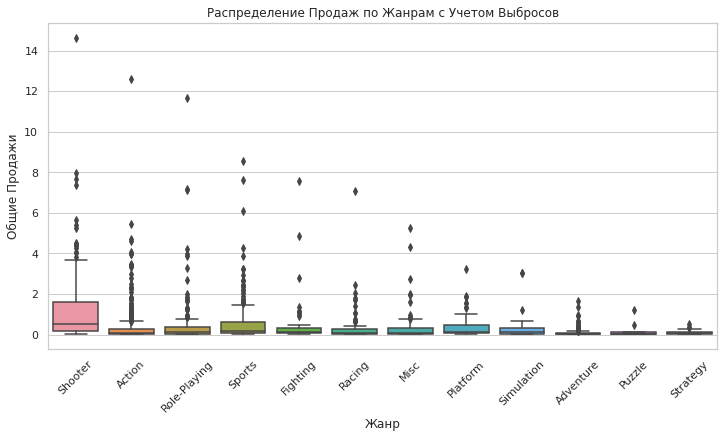

In [46]:
# Создание диаграммы размаха с выбросами
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=games_filtered)
plt.title('Распределение Продаж по Жанрам с Учетом Выбросов')
plt.xlabel('Жанр')
plt.ylabel('Общие Продажи')
plt.xticks(rotation=45)
plt.show()

**На диаграмме размаха, которая показывает распределение продаж по жанрам с учетом выбросов, можно сделать следующие наблюдения:**

- Медианные значения продаж по большинству жанров довольно низкие, что указывает на то, что типичные продажи игр в каждом жанре не очень высоки.
- Жанр "Shooter" выделяется среди других жанров более высокой медианой, что может указывать на большую популярность или более высокий уровень продаж игр в этом жанре по сравнению с другими.
- Есть значительное количество выбросов во многих жанрах, особенно в "Action" и "Shooter". Это означает, что некоторые игры в этих жанрах продавались намного лучше, чем большинство других игр.
- Разброс данных в жанрах "Action" и "Shooter" также более широкий, что указывает на большую вариативность в продажах игр; это может быть связано как с наличием очень успешных хитов, так и с большим количеством игр, которые не достигли высоких продаж.
- Другие жанры, такие как "Strategy" и "Adventure", имеют как более низкие медианные продажи, так и меньше выбросов, что может указывать на более низкую общую прибыльность и популярность игр в этих жанрах.

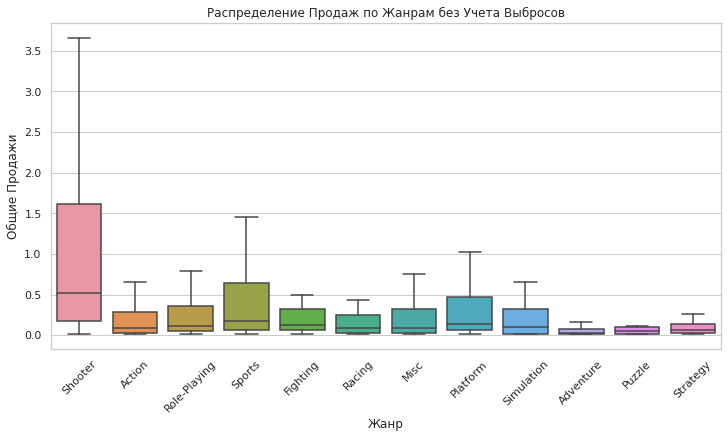

In [47]:
# Создание диаграммы размаха без выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=games_filtered, showfliers=False)
plt.title('Распределение Продаж по Жанрам без Учета Выбросов')
plt.xlabel('Жанр')
plt.ylabel('Общие Продажи')
plt.xticks(rotation=45)
plt.show()

**На второй диаграмме размаха, которая показывает распределение продаж по жанрам без учета выбросов, можно сделать следующие выводы:**

Медианные продажи: В отличие от первой диаграммы, медианные значения здесь уже не искажены выбросами. Можно заметить, что жанр "Shooter" имеет одну из самых высоких медиан, что указывает на стабильно высокий уровень продаж по сравнению с другими жанрами.

Межквартильный размах (IQR): Этот показатель измеряет разброс данных в середине распределения и здесь видно, что жанры "Shooter" и "Role-Playing" имеют больший IQR по сравнению с другими жанрами, что указывает на большую вариативность в продажах внутри этих жанров.

Усы диаграммы: Длинные усы у жанра "Shooter" говорят о том, что хотя есть игры с очень низкими продажами, также существует много игр, которые продаются лучше среднего. Это может быть признаком того, что жанр в целом популярен, но также содержит ряд менее успешных игр.

Сравнение стабильности: Жанры с более короткими усами и более узким IQR, такие как "Puzzle" и "Adventure", могут быть более стабильными в плане продаж, но также могут указывать на отсутствие игр с высокими продажами.

Общая успешность: Жанры с более высокими медианами и IQR, такие как "Shooter" и "Role-Playing", могут быть более прибыльными для издателей и разработчиков, поскольку средние продажи в этих жанрах выше.

Из этого анализа можно заключить, что жанр "Shooter" может быть одним из наиболее потенциально прибыльных жанров, но также имеет большую вариативность в успехе игр. Жанры "Puzzle" и "Adventure" могут предлагать меньше риска с точки зрения вариативности продаж, но также и меньше потенциала для высоких продаж.

**Промежуточный Вывод**

Из анализа видеоигровой индустрии можно сделать следующие выводы:
- Игровые платформы обычно имеют жизненный цикл около 10 лет, после чего их заменяют новые модели.
- Период с 2014 по 2016 год важен для анализа текущего положения на рынке и прогнозирования. PS4, Xbox One, 3DS и PC являются наиболее перспективными платформами.
- Корреляция между отзывами критиков и продажами игр умеренная и положительная, тогда как связь между отзывами пользователей и продажами слабая.
- Жанр "Action" лидирует по количеству выпущенных игр и общим продажам, но при этом отмечается значительная вариативность в успехе отдельных игр.
- Жанр "Shooter" выделяется высокими медианными продажами и вариативностью в успехе игр, что делает его потенциально прибыльным, но также сопряженным с рисками.
- Жанры с меньшей популярностью, такие как "Puzzle" и "Adventure", представляют меньший риск в плане вариативности продаж, но и имеют меньший потенциал для высоких продаж.

# Шаг 4. Составьте портрет пользователя каждого региона

**4.1. Определите для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

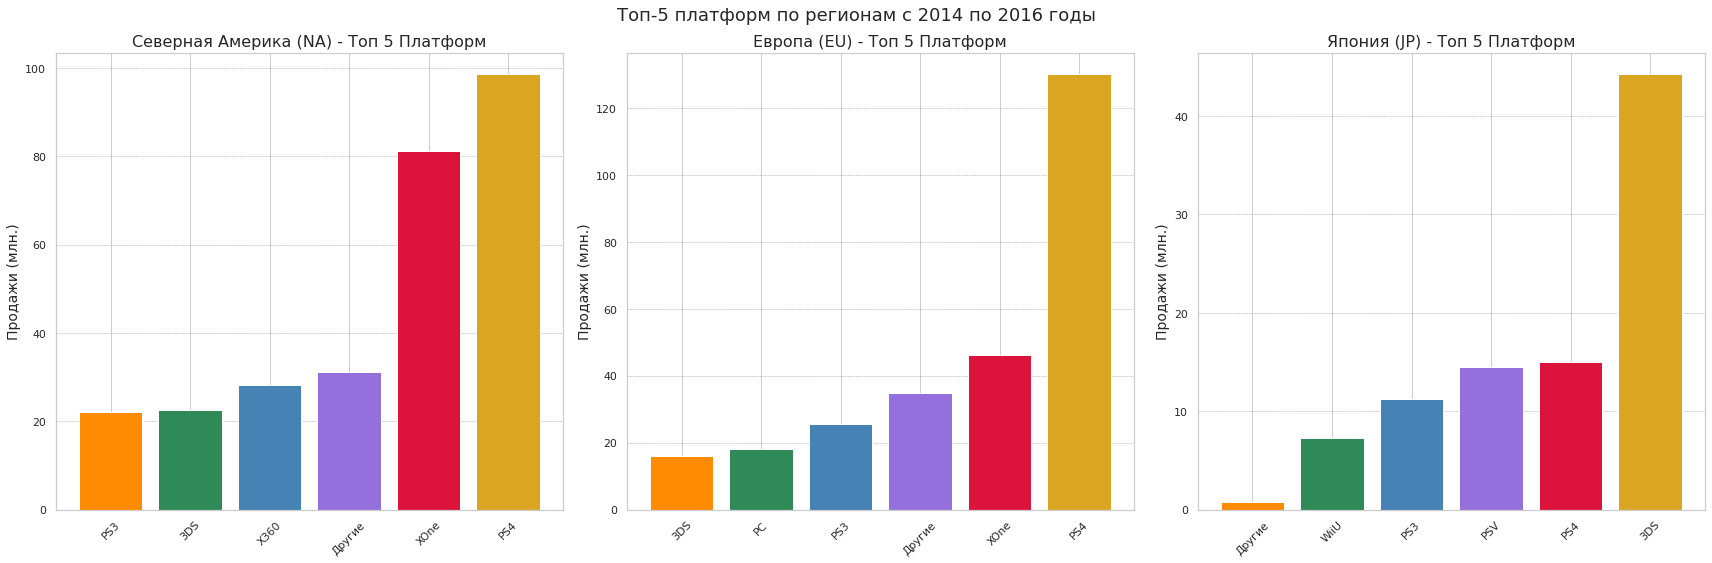

In [48]:
# Группировка и агрегирование данных по платформам для каждого региона
na_platform_sales = games_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=True)
eu_platform_sales = games_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=True)
jp_platform_sales = games_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=True)

# Выбор топ-5 платформ для каждого региона
top5_platform_na = na_platform_sales.tail(5)
top5_platform_eu = eu_platform_sales.tail(5)
top5_platform_jp = jp_platform_sales.tail(5)

# Вычисление общих продаж для каждого региона
na_total_sales = games_filtered['na_sales'].sum()
eu_total_sales = games_filtered['eu_sales'].sum()
jp_total_sales = games_filtered['jp_sales'].sum()

# Вычисление суммы продаж для топ-5 платформ
sum_top5_platform_na = top5_platform_na.sum()
sum_top5_platform_eu = top5_platform_eu.sum()
sum_top5_platform_jp = top5_platform_jp.sum()

# Вычисление продаж для категории "другие"
other_platform_na = na_total_sales - sum_top5_platform_na
other_platform_eu = eu_total_sales - sum_top5_platform_eu
other_platform_jp = jp_total_sales - sum_top5_platform_jp

# Создание DataFrame для каждого региона
top5_platform_na_df = pd.DataFrame({'Sales': top5_platform_na})
top5_platform_eu_df = pd.DataFrame({'Sales': top5_platform_eu})
top5_platform_jp_df = pd.DataFrame({'Sales': top5_platform_jp})

# Сортировка данных по убыванию для корректного отображения на графике
top5_platform_na_sorted = top5_platform_na_df.sort_values(by='Sales', ascending=True)
top5_platform_eu_sorted = top5_platform_eu_df.sort_values(by='Sales', ascending=True)
top5_platform_jp_sorted = top5_platform_jp_df.sort_values(by='Sales', ascending=True)

# Проверка наличия и добавление/обновление категории "Другие" в DataFrame для каждого региона
for platform_df, other_sales in zip([top5_platform_na_sorted, top5_platform_eu_sorted, top5_platform_jp_sorted], 
                                    [other_platform_na, other_platform_eu, other_platform_jp]):
    if 'Другие' in platform_df.index:
        platform_df.loc['Другие'] += other_sales  # Обновление существующей строки
    else:
        platform_df.loc['Другие'] = other_sales  # Добавление новой строки, если "Другие" не существует

# Сортировка DataFrame с учетом добавленной категории "другие"
top5_platform_na_sorted = top5_platform_na_sorted.sort_values(by='Sales', ascending=True)
top5_platform_eu_sorted = top5_platform_eu_sorted.sort_values(by='Sales', ascending=True)
top5_platform_jp_sorted = top5_platform_jp_sorted.sort_values(by='Sales', ascending=True)

# Увеличение размера фигуры
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Увеличенный размер фигуры для лучшей видимости

# Настройка размеров шрифтов
plt.rcParams.update({'font.size': 14})  # Настройка размера шрифта глобально

# Определение палитры цветов для лучшего контраста
colors = ['darkorange', 'seagreen', 'steelblue', 'mediumpurple', 'crimson', 'goldenrod']

# Добавление сетки и установка пределов для лучшего понимания масштаба
for ax in axes:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', axis='y', alpha=0.7)
    ax.set_axisbelow(True)

# Графики для каждого региона с сортированными данными
axes[0].bar(top5_platform_na_sorted.index, top5_platform_na_sorted['Sales'], color=colors)
axes[0].set_title('Северная Америка (NA) - Топ 5 Платформ', fontsize=16)
axes[0].set_ylabel('Продажи (млн.)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(top5_platform_eu_sorted.index, top5_platform_eu_sorted['Sales'], color=colors)
axes[1].set_title('Европа (EU) - Топ 5 Платформ', fontsize=16)
axes[1].set_ylabel('Продажи (млн.)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(top5_platform_jp_sorted.index, top5_platform_jp_sorted['Sales'], color=colors)
axes[2].set_title('Япония (JP) - Топ 5 Платформ', fontsize=16)
axes[2].set_ylabel('Продажи (млн.)', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)

# Настройка макета и отображение графиков
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Топ-5 платформ по регионам с 2014 по 2016 годы', fontsize=18)
plt.show()

Из представленных графиков видно, что предпочтения в платформах для видеоигр значительно различаются между Северной Америкой, Европой и Японией.

В Северной Америке наиболее популярной платформой является PS4, за ней следуют XOne и платформы категории "Другие", которая включает в себя все остальные платформы, не попавшие в топ-5. Далее идут X360 и 3DS. Заметно, что в Северной Америке предпочтения распределены довольно равномерно среди пятерки лидеров, за исключением PS4, которая имеет значительный отрыв по продажам.

В Европе доминирует та же PS4, и здесь она выделяется еще более отчетливо. XOne также популярна, но отстает от PS4 более чем вдвое по продажам. Категория "Другие" здесь занимает третье место, уступая XOne, а затем идут PS3 и PC. Европейский рынок показывает сильное предпочтение к PS4.

В Японии картина сильно отличается от Запада. Здесь лидирует платформа 3DS, что отражает популярность портативных игровых систем в этой стране. PS4 также популярна, но заметно уступает 3DS. Платформы PSV, PS3 и WiiU также входят в топ-5, но имеют значительно меньшие продажи, по сравнению с лидером. Категория "Другие" здесь занимает самое последнее место среди топ-5, что показывает сосредоточенность рынка на нескольких ключевых платформах.

В целом, можно сделать вывод, что PS4 является лидирующей платформой в Северной Америке и Европе, в то время как в Японии предпочтение отдаётся портативным консолям, в частности 3DS. 

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> пример графиков
        
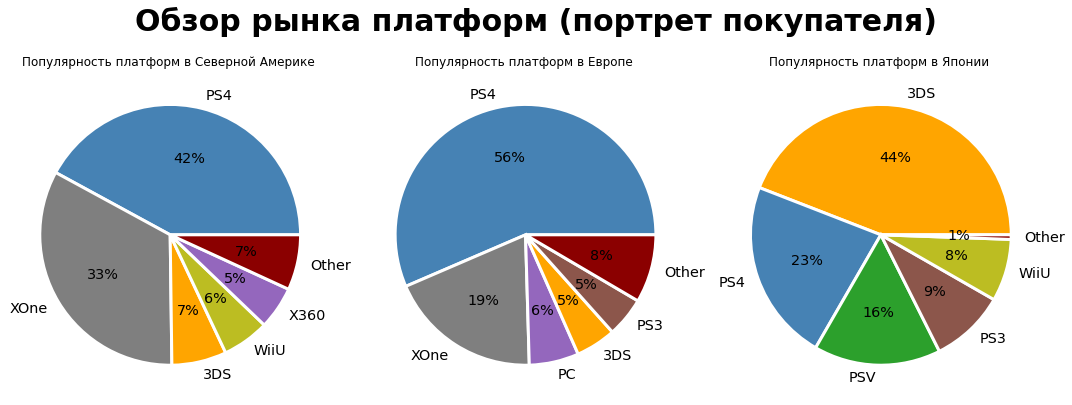        
        

__Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе__


**4.2. Определите для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5). Поясните разницу.**

In [1]:
# Группировка и агрегирование данных по жанрам для каждого региона
na_genre_sales = games_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=True)
eu_genre_sales = games_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=True)
jp_genre_sales = games_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=True)

# Выбор топ-5 жанров для каждого региона
top5_genre_na = na_genre_sales.tail(5)
top5_genre_eu = eu_genre_sales.tail(5)
top5_genre_jp = jp_genre_sales.tail(5)

# Вычисление общих продаж для каждого региона
na_total_sales = games_filtered['na_sales'].sum()
eu_total_sales = games_filtered['eu_sales'].sum()
jp_total_sales = games_filtered['jp_sales'].sum()

# Вычисление суммы продаж для топ-5 жанров
sum_top5_genre_na = top5_genre_na.sum()
sum_top5_genre_eu = top5_genre_eu.sum()
sum_top5_genre_jp = top5_genre_jp.sum()

# Вычисление продаж для категории "другие"
other_genre_na = na_total_sales - sum_top5_genre_na
other_genre_eu = eu_total_sales - sum_top5_genre_eu
other_genre_jp = jp_total_sales - sum_top5_genre_jp

# Создание DataFrame для каждого региона
top5_genre_na_df = pd.DataFrame({'Sales': top5_genre_na})
top5_genre_eu_df = pd.DataFrame({'Sales': top5_genre_eu})
top5_genre_jp_df = pd.DataFrame({'Sales': top5_genre_jp})

# Сортировка данных по убыванию для корректного отображения на графике
top5_genre_na_sorted = top5_genre_na_df.sort_values(by='Sales', ascending=True)
top5_genre_eu_sorted = top5_genre_eu_df.sort_values(by='Sales', ascending=True)
top5_genre_jp_sorted = top5_genre_jp_df.sort_values(by='Sales', ascending=True)

# Проверка наличия и добавление/обновление категории "Другие" в DataFrame для каждого региона
for genre_df, other_sales in zip([top5_genre_na_sorted, top5_genre_eu_sorted, top5_genre_jp_sorted], 
                                 [other_genre_na, other_genre_eu, other_genre_jp]):
    if 'Другие' in genre_df.index:
        genre_df.loc['Другие'] += other_sales  # Обновление существующей строки
    else:
        genre_df.loc['Другие'] = other_sales  # Добавление новой строки, если "Другие" не существует

# Сортировка DataFrame с учетом добавленной категории "другие"
top5_genre_na_sorted = top5_genre_na_sorted.sort_values(by='Sales', ascending=True)
top5_genre_eu_sorted = top5_genre_eu_sorted.sort_values(by='Sales', ascending=True)
top5_genre_jp_sorted = top5_genre_jp_sorted.sort_values(by='Sales', ascending=True)

# Увеличение размера фигуры
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Увеличенный размер фигуры для лучшей видимости

# Настройка размеров шрифтов
plt.rcParams.update({'font.size': 14})  # Настройка размера шрифта глобально

# Определение палитры цветов для лучшего контраста
colors = ['darkorange', 'seagreen', 'steelblue', 'mediumpurple', 'crimson', 'goldenrod']

# Добавление сетки и установка пределов для лучшего понимания масштаба
for ax in axes:
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey', axis='y', alpha=0.7)
    ax.set_axisbelow(True)

# Графики для каждого региона с сортированными данными
axes[0].bar(top5_genre_na_sorted.index, top5_genre_na_sorted['Sales'], color=colors)
axes[0].set_title('Северная Америка (NA) - Топ 5 Жанров', fontsize=16)
axes[0].set_ylabel('Продажи (млн.)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(top5_genre_eu_sorted.index, top5_genre_eu_sorted['Sales'], color=colors)
axes[1].set_title('Европа (EU) - Топ 5 Жанров', fontsize=16)
axes[1].set_ylabel('Продажи (млн.)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(top5_genre_jp_sorted.index, top5_genre_jp_sorted['Sales'], color=colors)
axes[2].set_title('Япония (JP) - Топ 5 Жанров', fontsize=16)
axes[2].set_ylabel('Продажи (млн.)', fontsize=14)
axes[2].tick_params(axis='x', rotation=45)

# Настройка макета и отображение графиков
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Топ-5 жанров по регионам с 2014 по 2016 годы', fontsize=18)
plt.show()

NameError: name 'games_filtered' is not defined

На предоставленном графике показаны топ-5 жанров видеоигр по продажам в трех различных регионах — Северной Америке (NA), Европе (EU) и Японии (JP) за период с 2014 по 2016 годы.

Северная Америка (NA):
Платформеры являются самым популярным жанром, с продажами чуть менее 7 миллионов единиц.
За ними следуют приключенческие игры, с продажами около 4 миллионов единиц.
Симуляторы и стратегии примерно на одном уровне, около 2-3 миллионов единиц.
Пазлы наименее популярны, с продажами менее 1 миллиона единиц.

Европа (EU):
Платформеры также занимают первое место, с продажами более 6 миллионов единиц.
Приключенческие игры на втором месте, с продажами около 6 миллионов единиц, что очень близко к платформерам.
Стратегии и головоломки имеют значительно более низкие продажи, с показателями около 1 миллиона и менее 1 миллиона соответственно.
Жанр Fighting (боевики) появляется только в Европе с продажами около 2 миллионов единиц.

Япония (JP):
Платформеры также ведущий жанр, но с гораздо меньшими общими продажами, чем в NA и EU, с показателем чуть более 2,5 миллиона единиц.
Симуляторы и гонки (Racing) имеют примерно одинаковые продажи, около 1,5 миллиона единиц.
Пазлы и стратегии находятся в нижней части списка, с продажами менее 1 миллиона единиц.

Сравнение:
Платформеры являются лидирующим жанром во всех трех регионах, хотя в Японии продажи этого жанра значительно ниже.
Приключенческие игры популярны в Северной Америке и Европе, но не входят в топ-5 в Японии.
Жанр Fighting популярен только в Европе.
Стратегии и пазлы имеют наименьшие продажи во всех регионах, хотя стратегии более популярны в Северной Америке и Европе по сравнению с Японией.
Гонки входят в топ-5 только в Японии.
В целом, можно заметить, что предпочтения в жанрах игр различаются между западными странами и Японией.

**4.3. Определите для пользователя каждого региона (NA, EU, JP): Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

,rating,na_sales,eu_sales,jp_sales
0,E,50.74,58.06,8.94
1,E10+,33.23,26.16,4.46
2,M,96.42,93.44,8.01
3,T,38.95,34.07,14.78
4,Unknown,64.72,58.95,56.90


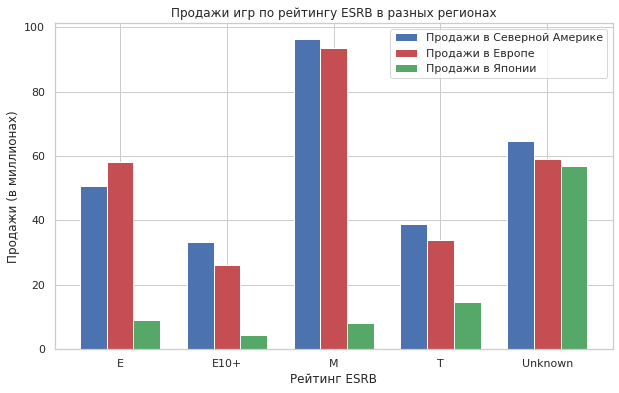

In [50]:
# Агрегация продаж по рейтингу ESRB для каждого региона
sales_by_rating = games_filtered.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Отображение таблицы агрегированных продаж по рейтингу ESRB
display(sales_by_rating)

# Визуализация результатов
plt.figure(figsize=(10, 6))

# Настройка позиций столбцов
bar_width = 0.25  # ширина каждого отдельного столбца
positions_na = np.arange(len(sales_by_rating['rating']))  # позиции столбцов для Северной Америки
positions_eu = [x + bar_width for x in positions_na]  # сдвигаем позиции для Европы
positions_jp = [x + bar_width for x in positions_eu]  # сдвигаем позиции для Японии

# Создание столбцов для каждого региона
plt.bar(positions_na, sales_by_rating['na_sales'], 
        width=bar_width, 
        label='Продажи в Северной Америке', 
        color='b')
plt.bar(positions_eu, sales_by_rating['eu_sales'], 
        width=bar_width, 
        label='Продажи в Европе', 
        color='r')
plt.bar(positions_jp, sales_by_rating['jp_sales'], 
        width=bar_width, 
        label='Продажи в Японии', 
        color='g')

# Установка заголовка и меток
plt.title('Продажи игр по рейтингу ESRB в разных регионах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи (в миллионах)')
plt.xticks([r + bar_width for r in positions_na], sales_by_rating['rating']) 

# Добавление легенды
plt.legend()

# Показываем график
plt.show()

Из графика можно сделать следующие выводы:
- Рейтинг E («Для всех»): Игры с таким рейтингом пользуются большой популярностью в Северной Америке и Европе, с продажами около 50 миллионов и чуть менее 50 миллионов соответственно. В Японии продажи игр с рейтингом E значительно ниже.
- Рейтинг E10+ («Для всех старше 10 лет»): Во всех регионах виден значительный спад продаж по сравнению с рейтингом E. Северная Америка и Европа показывают примерно одинаковые продажи для этого рейтинга, в то время как в Японии продажи ещё ниже.
- Рейтинг M («Для взрослых»): Игры с рейтингом M являются самыми продаваемыми в Северной Америке, достигая почти 100 миллионов продаж. Европа также показывает высокие продажи игр данного рейтинга, но они немного ниже, чем в Северной Америке. В Японии продажи игр с рейтингом M значительно ниже, чем в других регионах.
- Рейтинг T («Для подростков»): Игры с этим рейтингом имеют схожий уровень продаж в Северной Америке и Европе, однако в Японии продажи намного меньше.

Сравнительный анализ показывает, что:
- Рейтинг M является самым популярным в Северной Америке и Европе, что может свидетельствовать о высоком спросе на игры для взрослой аудитории в этих регионах.
- В Японии продажи игр с рейтингом E и T ниже, чем в Северной Америке и Европе, что может указывать на различия в культурных предпочтениях и вкусах.
- Рейтинг E10+ не пользуется большой популярностью во всех регионах, что может быть связано с тем, что этот рейтинг занимает промежуточное положение между «для всех» и «для подростков», и игры с таким рейтингом могут не удовлетворять потребности конкретной аудитории.

В Японии существует своя система рейтингов для видеоигр — CERO (Computer Entertainment Rating Organization). Многие игры, выпущенные локально, могут быть оценены исключительно по этой системе, а не по ESRB, которая более характерна для американского рынка.

**Промежуточный вывод:**

Из анализа предпочтений по платформам, жанрам игр и рейтингам в разных регионах можно сделать следующие выводы:

Платформы: PS4 доминирует в Северной Америке и Европе, тогда как в Японии предпочтение отдаётся портативным платформам, в частности 3DS. Это отражает географические особенности потребления игрового контента.

Жанры: Платформеры популярны во всех регионах, но наибольшие продажи наблюдаются в Северной Америке и Европе. Приключенческие игры также востребованы в этих регионах, в отличие от Японии, где предпочтения склоняются к симуляторам и гонкам. Это указывает на различия в культурных предпочтениях и игровых традициях.

Рейтинги: В Северной Америке и Европе игры с рейтингом M («Для взрослых») пользуются наибольшей популярностью, что свидетельствует о спросе на игры с более зрелым контентом. В Японии продажи игр с рейтингами E и T ниже, что может отражать особенности местного рынка и предпочтения аудитории.

Проверьте гипотезы:

**5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- Задайте самостоятельно пороговое значение alpha - 0.05

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Ответ: 

Прежде чем приступить к анализу данных, давайте сформулируем нулевую и альтернативную гипотезы, а также определим критерий, который мы будем использовать для проверки гипотез.

**Формулировка гипотез**

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза всегда формулируется таким образом, чтобы использовать знак равенства.
Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются. Это гипотеза, которую мы проверяем на предмет того, дает ли наше исследование достаточно оснований для отклонения нулевой гипотезы.

**Выбор критерия для проверки гипотез**
Для проверки гипотезы мы можем использовать t-критерий Стьюдента для независимых выборок, поскольку:
 - Мы сравниваем средние двух независимых групп (рейтинги игр на Xbox One и PC).
 - Мы предполагаем, что данные распределены нормально (это предположение потребуется проверить).

**Пороговое значение alpha**
Пороговое значение alpha установим равным 0.05, что является стандартным выбором для многих статистических тестов. Это означает, что мы принимаем 5% вероятность ошибки первого рода (отклонения нулевой гипотезы, когда она на самом деле верна).

In [51]:
# Подсчет пропущенных значений в 'user_score' для Xbox One
missing_data_xbox = games[games['platform'] == 'XOne']['user_score'].isnull().sum()
print("Пропущенных значений в 'user_score' для Xbox One:", missing_data_xbox)

# Фильтрация данных для Xbox One и PC
xbox = games[games['platform'] == 'XOne']['user_score'].dropna().tolist()  # Исключение NaN значений
pc = games[games['platform'] == 'PC']['user_score'].dropna().tolist()  # Исключение NaN значений

Пропущенных значений в 'user_score' для Xbox One: 65


In [52]:
# Фильтрация данных для Xbox One
xbox = games[(games['platform'] == 'XOne') & (games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]['user_score'].dropna().tolist()

# Фильтрация данных для PC
pc = games[(games['platform'] == 'PC') & (games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]['user_score'].dropna().tolist()

In [53]:
# Критический уровень статистической значимости
alpha = 0.05

# Выполнение t-теста
results = stats.ttest_ind(xbox, pc)
print('p-значение:', round(results.pvalue, 2))

# Проверка значимости результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14
Не получилось отвергнуть нулевую гипотезу


Вывод:

Исходя из полученного p-значения (0.14), мы не имеем оснований отвергнуть нулевую гипотезу H0 о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

Проверьте гипотезы:

**5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

- Задайте самостоятельно пороговое значение alpha - 0.05

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


Ответ:

Для проверки гипотезы о средних пользовательских рейтингах жанров Action и Sports, сформулируем нулевую и альтернативную гипотезы, а затем определим, какой статистический критерий лучше всего подходит для этой задачи.

**Формулировка гипотез**

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковы. Нулевая гипотеза обычно формулируется таким образом, чтобы отражать отсутствие различий или изменений, то есть используется знак равенства.
Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются. Альтернативная гипотеза предполагает наличие различий между группами.

**Выбор критерия для проверки гипотез**
Для проверки этой гипотезы мы можем использовать t-тест Стьюдента для независимых выборок, если выполняются следующие условия:
- Нормальность распределения: Данные в каждой группе должны быть приблизительно нормально распределены. Это условие особенно важно для небольших выборок.
- Гомогенность дисперсий: Дисперсии в группах должны быть примерно равны.

**Установка уровня значимости alpha**
Мы установим пороговое значение alpha равным 0.05, что является стандартным выбором для проверки статистической значимости.

In [54]:
# Подсчет пропущенных значений в 'user_score' для жанра Action
missing_data_action = games[games['genre'] == 'Action']['user_score'].isnull().sum()
print("Пропущенных значений в 'user_score' для жанра Action:", missing_data_action)

# Подсчет пропущенных значений в 'user_score' для жанра Sports
missing_data_sports = games[games['genre'] == 'Sports']['user_score'].isnull().sum()
print("Пропущенных значений в 'user_score' для жанра Sports:", missing_data_sports)

# Фильтрация данных для жанров Action и Sports
action_scores = games[games['genre'] == 'Action']['user_score'].dropna().tolist()  # Исключение NaN значений
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna().tolist()  # Исключение NaN значений

Пропущенных значений в 'user_score' для жанра Action: 1511
Пропущенных значений в 'user_score' для жанра Sports: 1225


In [55]:
# Критический уровень статистической значимости
alpha = 0.05

# Выполнение t-теста
results = stats.ttest_ind(action_scores, sports_scores)
print('p-значение:', round(results.pvalue, 2))

# Проверка значимости результатов
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.07
Не получилось отвергнуть нулевую гипотезу


Вывод:
Исходя из полученного p-значения (0.07), мы не можем отвергнуть нулевую гипотезу (H0), которая утверждает, что средние пользовательские рейтинги жанров Action и Sports одинаковы. 

**Промежуточный Вывод:**

Исходя из проведенных статистических тестов и полученных p-значений (0.14 для сравнения платформ Xbox One и PC и 0.07 для сравнения жанров Action и Sports), мы не обнаружили статистически значимых различий и, следовательно, не имеем оснований отвергнуть нулевые гипотезы (H0). Это указывает на то, что средние пользовательские рейтинги как для платформ (Xbox One и PC), так и для жанров (Action и Sports) не имеют значимых отличий.

### check

# Общий Вывод

1. **Жизненный цикл игровых платформ**:
- Игровые платформы имеют жизненный цикл около 10 лет. Это означает, что индустрия постоянно развивается, и игровые компании должны адаптироваться к этим изменениям, предлагая новые модели и технологии.

2. **Перспективные платформы и анализ рынка**:
- Период с 2014 по 2016 год был ключевым для понимания текущих тенденций и прогнозирования будущего рынка. PS4, Xbox One, 3DS и PC выделяются как наиболее перспективные платформы.

3. **Взаимосвязь отзывов и продаж**:
- Существует умеренная и положительная корреляция между отзывами критиков и продажами игр, в то время как связь между отзывами пользователей и продажами является слабой. Это указывает на то, что мнение критиков может иметь большее влияние на успешность игры, чем мнение пользователей.

4. **Динамика жанров**:
- Жанр "Action" лидирует по количеству выпущенных игр и общим продажам, но характеризуется значительной вариативностью успеха отдельных игр.
- Жанр "Shooter" примечателен высокими медианными продажами и вариативностью в успехе игр, что делает его потенциально прибыльным, но также сопряженным с рисками.
- Жанры с меньшей популярностью, такие как "Puzzle" и "Adventure", представляют меньший риск в плане вариативности продаж, но и имеют меньший потенциал для высоких продаж.

5. **Предпочтения по платформам и жанрам в разных регионах**:
- PS4 доминирует в Северной Америке и Европе, в то время как в Японии предпочтение отдаётся портативным платформам, особенно 3DS.
- Жанры платформеров популярны во всех регионах, особенно в Северной Америке и Европе. В Японии отдают предпочтение симуляторам и гонкам.

6. **Рейтинги игр и региональные предпочтения**:
- В Северной Америке и Европе наибольшей популярностью пользуются игры с рейтингом M («Для взрослых»), что указывает на спрос на игры с более зрелым контентом.
- В Японии продажи игр с рейтингами E и T ниже, что может отражать особенности местного рынка и предпочтения аудитории.

7. **Статистический анализ рейтингов**:

Исходя из проведенных статистических тестов и полученных p-значений (0.14 для сравнения платформ Xbox One и PC и 0.07 для сравнения жанров Action и Sports), мы не обнаружили статистически значимых различий и, следовательно, не имеем оснований отвергнуть нулевые гипотезы (H0). Это указывает на то, что средние пользовательские рейтинги как для платформ (Xbox One и PC), так и для жанров (Action и Sports) не имеют значимых отличий.